<a href="https://www.kaggle.com/code/nttthanh/opportunity-of-da-eda-evaluating-model?scriptVersionId=130931277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


[//]: <> (Table of content)
<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
* [1. Introduction](#1)
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    
* [2. Import libraries](#2) 
    
* [3. Basic Exploration](#3)
    - [Read dataset](#3.1)
    - [Some information](#3.2)
    - [Data transformation](#3.3)
    - [Data visualization](#3.4)
* [4. Machine Learning model](#4)
    
* [5 Conclusion](#5)

* [6 Author Message](#6)

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Introduction</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Problem</b> statement

> <span style='font-size:18px; font-family:Verdana;color: #254E58;'><b>
Information of DS</b></span>
* Data scientists are highly valued in various industries, including finance, healthcare, retail, and technology. Due to the high demand for their skills, data scientists are often offered competitive salaries and benefits packages.

* In recent years, data scientists have been changing jobs more frequently than before. This trend is partly due to the increasing number of job opportunities available for data scientists, but it's also because data scientists are seeking new challenges and opportunities for growth.

* Many data scientists change jobs to gain experience in new industries, work with new data types, or to work on different types of projects. Additionally, some data scientists may change jobs to work for companies that offer better salaries, benefits, and work-life balance.

* Changing jobs can be an opportunity to advance one's career, gain new skills and experience, and increase earning potential. However, it's important to note that frequent job changes can also be viewed negatively by potential employers, who may see it as a lack of commitment or instability.

* Overall, the situation of job change for data scientists is dynamic, with many opportunities available for those seeking to advance their careers. However, it's important to weigh the benefits and drawbacks of changing jobs and make an informed decision based on personal and professional goals.

> <span style='font-size:18px; font-family:Verdana;color: #254E58;'><b>
Reasons of changing job</b></span>
* Career Growth: Data scientists may feel that they have reached a plateau in their current role and that there is no room for further growth or advancement within their organization. Changing jobs can provide new opportunities for career growth and development, such as working with new technologies, leading projects, or managing a team.

* Salary and Benefits: Changing jobs can also be an opportunity to negotiate a higher salary or better benefits, such as stock options, health insurance, or a more flexible work schedule. This can be particularly appealing for data scientists who have gained valuable experience and skills in their current role and are now seeking compensation that reflects their value in the job market.

* Company Culture: Company culture is an important factor in job satisfaction, and data scientists may find that they are not a good fit with the culture of their current organization. Changing jobs can provide an opportunity to work for a company with a culture that aligns more closely with their values and work style.

* Work-Life Balance: Many data scientists work long hours and may feel that their work-life balance is not optimal. Changing jobs can be an opportunity to work for a company that values work-life balance and offers flexible hours or remote work options.

* New Challenges and Opportunities: Finally, changing jobs can be an opportunity for data scientists to work on new and exciting projects, tackle new challenges, and gain experience in new industries or sectors. This can help keep their work interesting and challenging, and prevent them from feeling bored or stagnated in their careers.

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> description </h2> <br />

* enrollee_id : Unique ID for candidate

* city: City code

* city_ development _index : Developement index of the city (scaled)

* gender: Gender of candidate

* relevent_experience: Relevant experience of candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline :Education major discipline of candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type : Type of current employer

* last_new_job: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for job change, 1 – Looking for a job change


[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import Libraries</b></div>

In [278]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re
print("Setup Complete")

Setup Complete


[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Exploration</b></div>

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Read</b> dataset

In [279]:
def read_dataset(file_path):
    data = pd.read_csv(file_path, index_col = 0)
    return data

In [280]:
file_path = '/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv'
data = read_dataset(file_path)

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Some</b> information

In [281]:
data.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0


In [282]:
data.shape

(19158, 13)

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [284]:
data.nunique()

city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64

In [285]:
data.duplicated().any()

True


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> transformation

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Missing Data Treatment</b></span>

In [286]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  19158


,Total Missing,In Percent
company_type,6140,32.05
company_size,5938,30.99
gender,4508,23.53
major_discipline,2813,14.68
education_level,460,2.40
last_new_job,423,2.21
enrolled_university,386,2.01
experience,65,0.34
city,0,0.00
city_development_index,0,0.00


In [287]:
print("Company Type: ", data['company_type'].unique().tolist())
print("Company Size: ",data['company_size'].unique().tolist())
print("Gender: ",data['gender'].unique().tolist())
print("Major Discipline: ",data['major_discipline'].unique().tolist())
print("Education Level: ",data['education_level'].unique().tolist())
print("Last New Job: ",data['last_new_job'].unique().tolist())
print("Enrolled University: ",data['enrolled_university'].unique().tolist())
print("Experience: ",data['experience'].unique().tolist())

Company Type:  [nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO']
Company Size:  [nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999']
Gender:  ['Male', nan, 'Female', 'Other']
Major Discipline:  ['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major', 'Other']
Education Level:  ['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School']
Last New Job:  ['1', '>4', 'never', '4', '3', '2', nan]
Enrolled University:  ['no_enrollment', 'Full time course', nan, 'Part time course']
Experience:  ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan]


In [288]:
data = data.replace(np.nan, 'Unknown')

In [289]:
print("Company Type: ", data['company_type'].unique().tolist())
print("Company Size: ",data['company_size'].unique().tolist())
print("Gender: ",data['gender'].unique().tolist())
print("Major Discipline: ",data['major_discipline'].unique().tolist())
print("Education Level: ",data['education_level'].unique().tolist())
print("Last New Job: ",data['last_new_job'].unique().tolist())
print("Enrolled University: ",data['enrolled_university'].unique().tolist())
print("Experience: ",data['experience'].unique().tolist())

Company Type:  ['Unknown', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other', 'Public Sector', 'NGO']
Company Size:  ['Unknown', '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999']
Gender:  ['Male', 'Unknown', 'Female', 'Other']
Major Discipline:  ['STEM', 'Business Degree', 'Unknown', 'Arts', 'Humanities', 'No Major', 'Other']
Education Level:  ['Graduate', 'Masters', 'High School', 'Unknown', 'Phd', 'Primary School']
Last New Job:  ['1', '>4', 'never', '4', '3', '2', 'Unknown']
Enrolled University:  ['no_enrollment', 'Full time course', 'Unknown', 'Part time course']
Experience:  ['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4', '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'Unknown']


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Duplicated Data Treatment</b></span>

In [290]:
data[data.duplicated()].head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
6685,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,15,Unknown,Unknown,>4,47,0.0
25835,city_159,0.843,Male,Has relevent experience,no_enrollment,High School,Unknown,>20,Unknown,Unknown,>4,44,0.0
3015,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,91,0.0
1686,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,2,Unknown,Unknown,never,42,1.0
23517,city_103,0.920,Male,No relevent experience,no_enrollment,High School,Unknown,4,Unknown,Unknown,never,21,0.0
19041,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,1,22,0.0
29930,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,>4,58,0.0
3736,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,3,48,1.0
27402,city_103,0.920,Male,No relevent experience,no_enrollment,High School,Unknown,3,Unknown,Unknown,never,96,0.0


In [291]:
data = data.drop_duplicates().sort_index()

In [292]:
data.duplicated().any()

False

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Clean Data</b></span>

In [293]:
data.loc[data['relevent_experience'].str.contains('Has', regex=False), 'relevent'] =  True
data.loc[data['relevent_experience'].str.contains('No', regex=False), 'relevent'] =  False
data['relevent_experience'] = data['relevent'].astype('bool')

In [294]:
def is_change(x):
    if x in ['Unknown', 'Other', 'never']: 
        return False
    return True

def converter_size(x):
    result = x
    if is_change(x):
        if '<' in x:
            result = int(re.sub(r"\D+", "", x)) - 1
        elif '>' in x or '+' in x:
            result = int(re.sub(r"\D+", "", x)) + 1
        elif '-' in x:
            result = int(x.split('-')[0])
        else:
            result = int(x)
    return result

def company_enterprise(x):
    result = x
    if is_change(x):
        temp = converter_size(x)
        if temp in range(1,10):
            result = 'Micro'
        elif temp in range(10,50):
            result = 'Small'
        elif temp in range(50, 250):
            result = 'Medium-sized'
        else:
            result = 'Large'
    return result

def expertise_level(x):
    result = x
    if is_change(x):
        temp = converter_size(x)
        if temp in range(0, 2):
            result = 'Junior'
        elif temp in range(2, 5):
            result = 'Middle'
        elif temp in range(5, 8):
            result = 'Senior'
        else:
            result = 'Lead'
    return result

In [295]:
data['company_size'] = data['company_size'].str.replace('/', '-')
data['company_size'] = data['company_size'].astype('str')
data['company_enterprise'] = data['company_size'].apply(company_enterprise)

In [296]:
data[['company_size', 'company_enterprise']].head(10)

,company_size,company_enterprise
enrollee_id,,
1,Unknown,Unknown
2,10000+,Large
4,50-99,Medium-sized
5,<10,Micro
7,Unknown,Unknown
8,100-500,Medium-sized
9,Unknown,Unknown
10,<10,Micro
11,Unknown,Unknown


In [297]:
data['expertise_level'] = data['experience'].apply(expertise_level)
data[['experience', 'expertise_level']].head(10)

,experience,expertise_level
enrollee_id,,
1,2,Middle
2,15,Lead
4,9,Lead
5,10,Lead
7,13,Lead
8,13,Lead
9,>20,Lead
10,15,Lead
11,11,Lead


In [298]:
data['last_new_job'] = data['last_new_job'].apply(converter_size)
data['last_new_job'].head(10)

enrollee_id
1     never
2         3
4         5
5         1
7         1
8         2
9         5
10        1
11        4
13        5
Name: last_new_job, dtype: object

In [299]:
data = data.drop(['relevent', 'company_size', 'experience'], axis = 1)

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> visualization

In [300]:
mean_rate = data['city_development_index'].mean()
print('Mean of the rate of economic development: ', mean_rate.round(2))
count_over_mean = data['city_development_index'].loc[data['city_development_index'] > mean_rate].count()
print('The number of city with high rate of economic development: ', count_over_mean)
count_lower_mean = data['city_development_index'].loc[data['city_development_index'] < mean_rate].count()
print('The number of city with low rate of economic development: ', count_lower_mean)

opposite_rate = pd.DataFrame({'quality': [count_over_mean, count_lower_mean]}, index = ['High', 'Low'])

Mean of the rate of economic development:  0.83
The number of city with high rate of economic development:  12524
The number of city with low rate of economic development:  6585


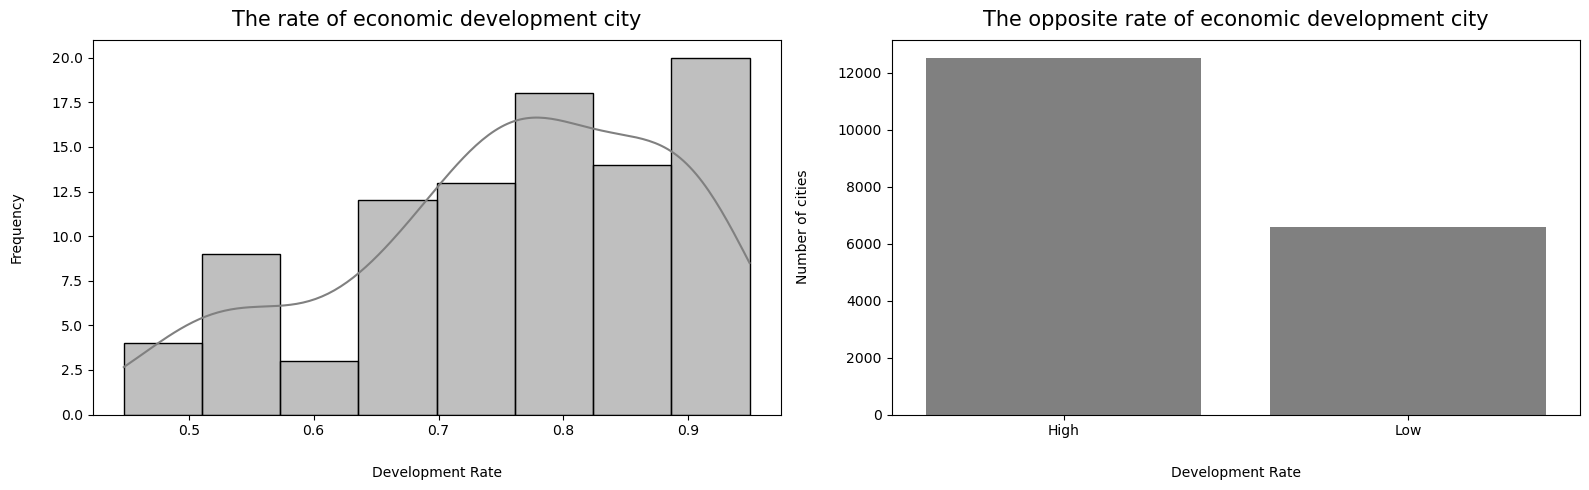

In [301]:
fig, axes = plt.subplots(1, 2, figsize = (16,5)) 

sns.histplot(ax = axes[0], data = data['city_development_index'].unique(), color = 'grey', kde = True)
sns.barplot(ax = axes[1], data = opposite_rate, x = opposite_rate.index, y = opposite_rate['quality'], color = 'grey')

axes[0].set_title("The rate of economic development city", pad=10, fontsize=15)
axes[0].set_ylabel("Frequency", labelpad=20)
axes[0].set_xlabel("Development Rate", labelpad=20)

axes[1].set_title("The opposite rate of economic development city", pad=10, fontsize=15)
axes[1].set_ylabel("Number of cities", labelpad=20)
axes[1].set_xlabel("Development Rate", labelpad=20)

plt.tight_layout()

plt.show()

In [302]:
dfs_name = ['gender_count', 're_experience_count', 'enrolled_u', 'edu_level', 'm_discipline', 'ex_level']
cols_name = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'expertise_level']
def attribute_count(col_name):
    df = pd.DataFrame(data[col_name].value_counts()).reset_index()
    df.columns = [col_name, 'count']
    return df

In [303]:
for i in range(0, len(dfs_name)):
    dfs_name[i] = attribute_count(cols_name[i])

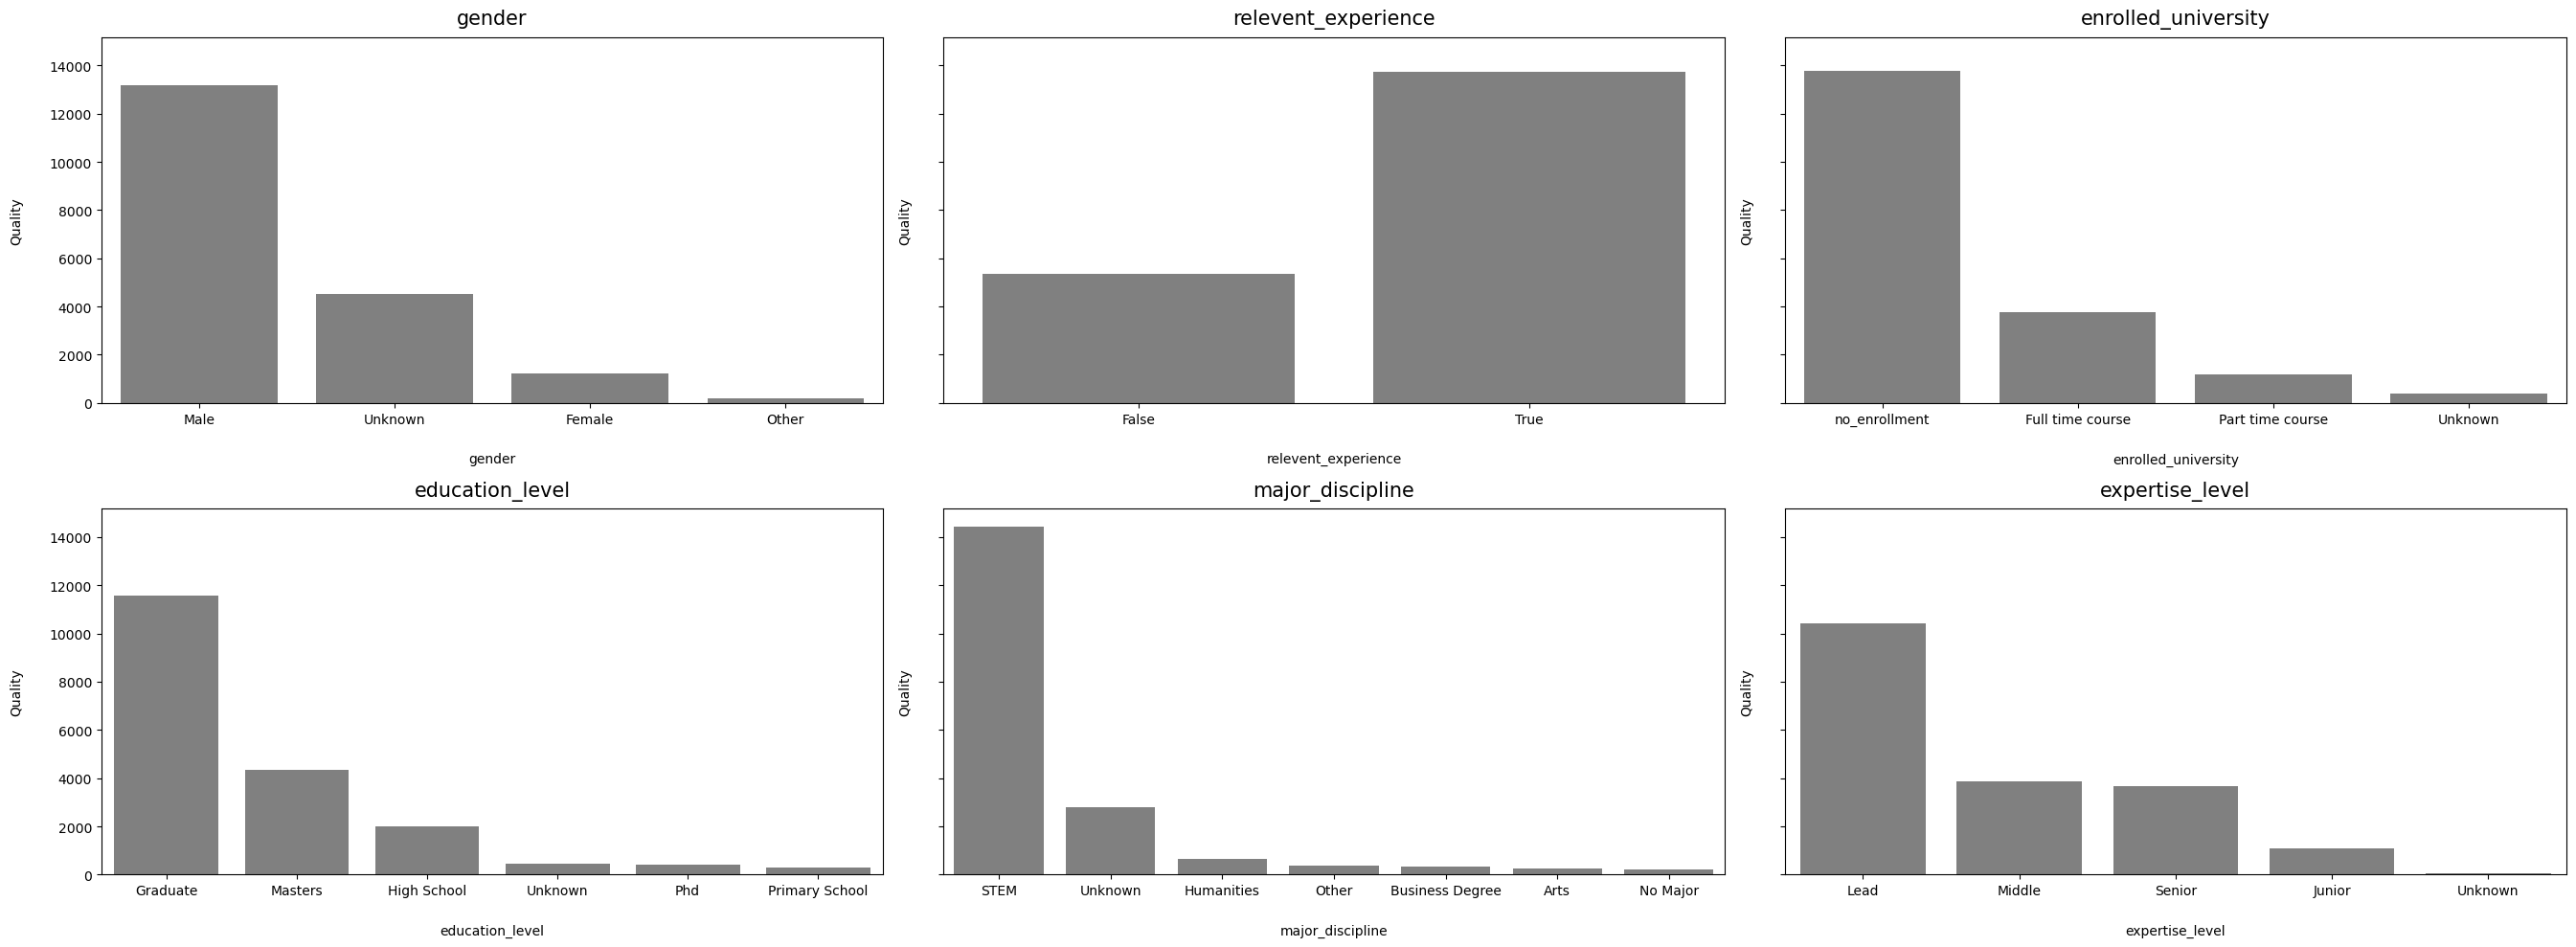

In [304]:
fig, axes = plt.subplots(2, 3, figsize = (27, 10), sharey = True)

n, m = 2, 3
for i in range (0, n):
    for j in range (0, m):
        sns.barplot(ax = axes[i, j], data = dfs_name[i * m + j], x = cols_name[i * m + j], y = 'count', color = 'gray')
        axes[i, j].set_title(cols_name[i * m + j], pad=10, fontsize=15)
        axes[i, j].set_ylabel("Quality", labelpad=20)
        axes[i, j].set_xlabel(cols_name[i * m + j], labelpad=20)

plt.tight_layout()
plt.show()

In [305]:
dfs_name = ['edu_level', 'm_discipline']
cols_name = ['education_level', 'major_discipline']
def counting_by_gender(col_name):
    df = pd.DataFrame (data.groupby(['gender', col_name]).size())
    df.columns = ['count']
    df = df.reset_index()
    return df

In [306]:
for i in range(0, len(dfs_name)):
    dfs_name[i] = counting_by_gender(cols_name[i])

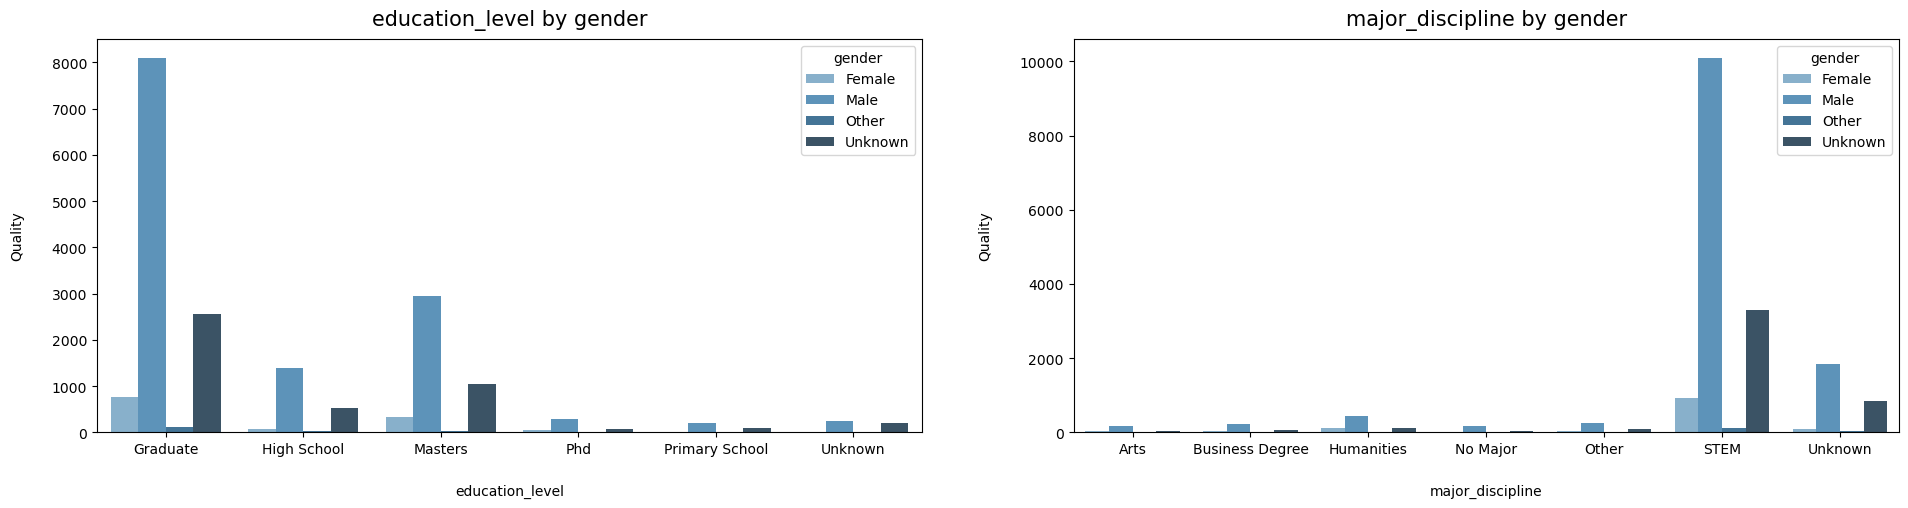

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for i in range(0, 2):
    sns.barplot(ax = axes[i], data = dfs_name[i], x = cols_name[i], y = 'count', hue = 'gender', palette='Blues_d')
    axes[i].set_title('{} by gender'.format(cols_name[i]), pad=10, fontsize=15)
    axes[i].set_ylabel("Quality", labelpad=20)
    axes[i].set_xlabel(cols_name[i], labelpad=20)
    

fig.tight_layout(pad = 4.0)
plt.show()

In [308]:
dfs_name = ['edu_level', 'ex_level']
cols_name = ['education_level', 'expertise_level']
def counting_by_re_experience(col_name):
    df = pd.DataFrame (data.groupby(['relevent_experience', col_name]).size())
    df.columns = ['count']
    df = df.reset_index()
    return df

In [309]:
for i in range(0, len(dfs_name)):
    dfs_name[i] = counting_by_re_experience(cols_name[i])

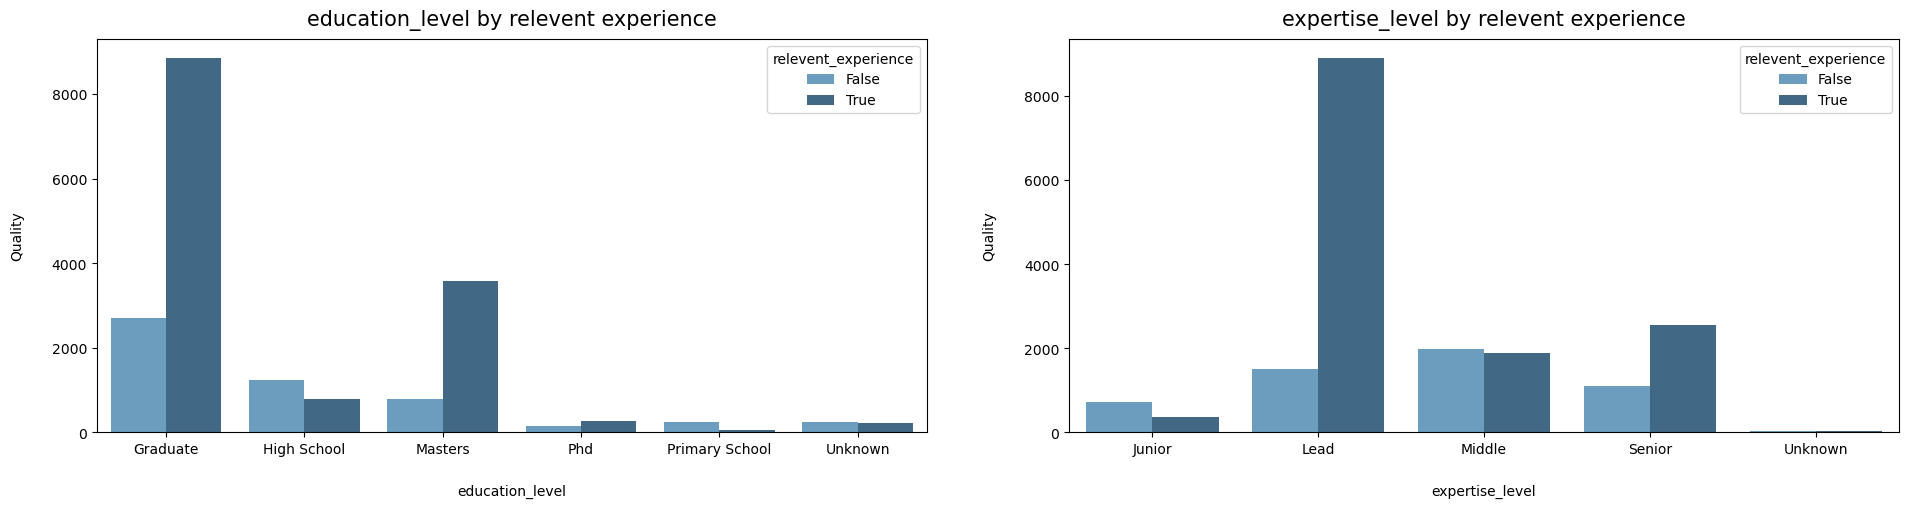

In [310]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for i in range(0, 2):
    sns.barplot(ax = axes[i], data = dfs_name[i], x = cols_name[i], y = 'count', hue = 'relevent_experience', palette='Blues_d')
    axes[i].set_title('{} by relevent experience'.format(cols_name[i]), pad=10, fontsize=15)
    axes[i].set_ylabel("Quality", labelpad=20)
    axes[i].set_xlabel(cols_name[i], labelpad=20)
    

fig.tight_layout(pad = 4.0)
plt.show()

In [311]:
ex_level_by_total_training_hours = pd.DataFrame(data.groupby('expertise_level')['training_hours'].sum()).reset_index()

ex_level_in_development_city = pd.DataFrame(data.groupby('city_development_index')['expertise_level'].count()).reset_index()
ex_level_in_development_city = ex_level_in_development_city.loc[ex_level_in_development_city['city_development_index'] > mean_rate]

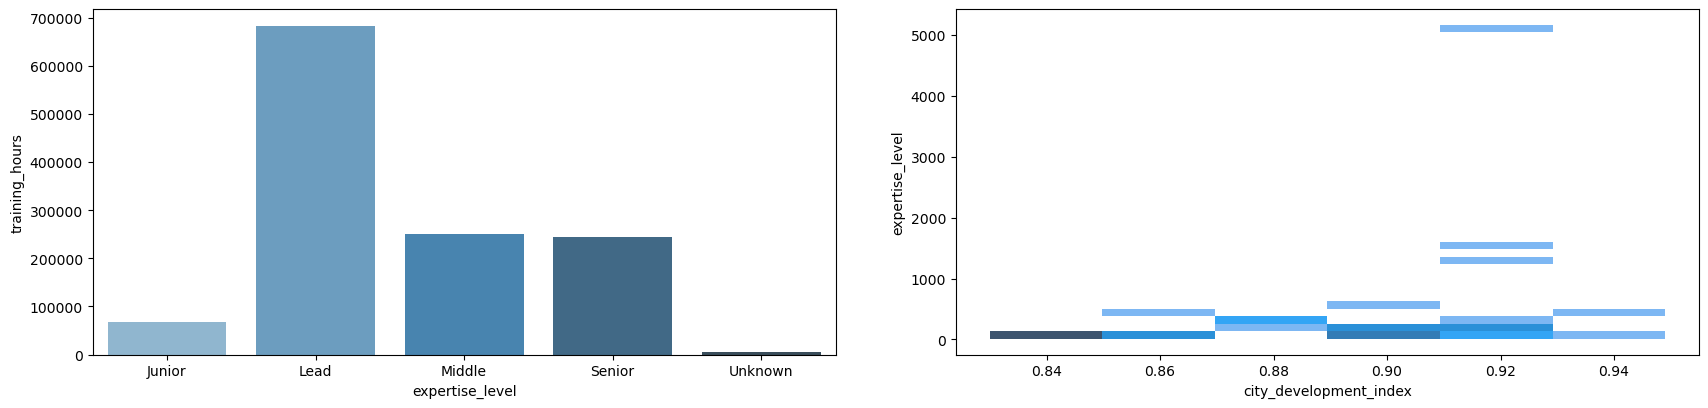

In [312]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(ax = axes[0], data = ex_level_by_total_training_hours, x = 'expertise_level', y = 'training_hours', palette='Blues_d')
sns.histplot(ax = axes[1], data = ex_level_in_development_city, x = 'city_development_index', y = 'expertise_level', kde = True)

fig.tight_layout(pad = 4.0)

plt.show()

In [313]:
mean_training_hours = data['training_hours'].mean()
print('Mean of training hours: ', mean_training_hours.round(2))
count_over_mean = data['training_hours'].loc[data['training_hours'] > mean_training_hours].count()
print('The number of employees with high training_hours: ', count_over_mean)
count_lower_mean = data['training_hours'].loc[data['training_hours'] < mean_training_hours].count()
print('The number of employees with low training_hours: ', count_lower_mean)

Mean of training hours:  65.44
The number of employees with high training_hours:  6919
The number of employees with low training_hours:  12190


In [314]:
job_transfer_rate = data['last_new_job'].loc[data['last_new_job'] != 'never'].count() / data['last_new_job'].count() * 100
print('Job transfer rate: ', job_transfer_rate.round(2))

Job transfer rate:  87.19


In [315]:
job_transfer = pd.DataFrame(data.groupby(['last_new_job','expertise_level']).size())
job_transfer.columns = ['quality']
job_transfer = job_transfer.reset_index()

In [316]:
never_job_transfer = job_transfer.loc[job_transfer['last_new_job'] == 'never']
job_transfer = job_transfer.loc[job_transfer['last_new_job'] != 'never']

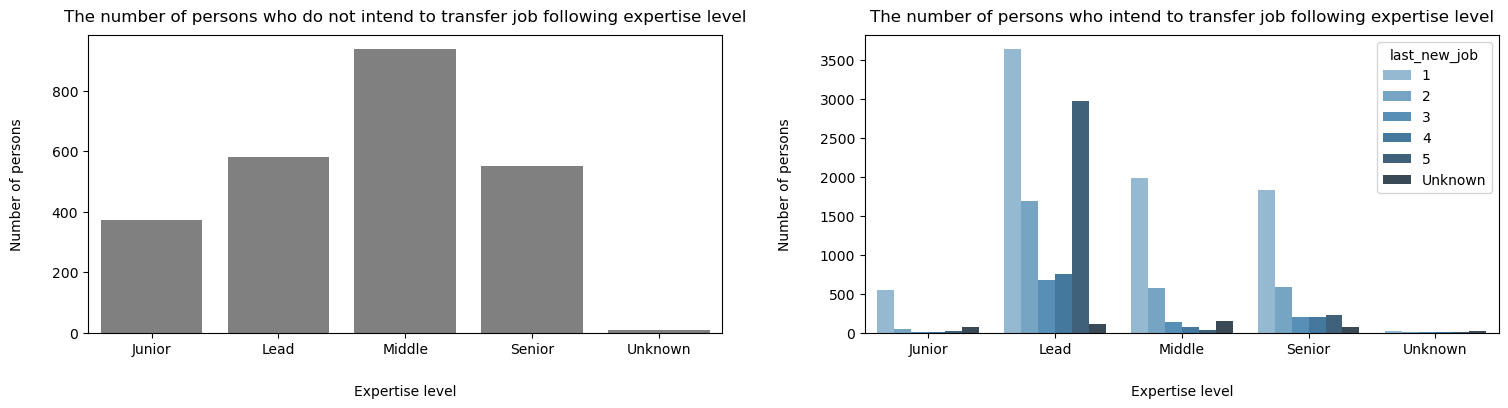

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(ax = axes[0], data = never_job_transfer, x = 'expertise_level', y = 'quality', color = 'gray')
sns.barplot(ax = axes[1], data = job_transfer, x = 'expertise_level', y = 'quality', hue = 'last_new_job', palette='Blues_d')
# color='gray'
axes[0].set_title("The number of persons who do not intend to transfer job following expertise level", pad=10)
axes[0].set_ylabel("Number of persons", labelpad=20)
axes[0].set_xlabel("Expertise level", labelpad=20)

axes[1].set_title("The number of persons who intend to transfer job following expertise level", pad=10)
axes[1].set_ylabel("Number of persons", labelpad=20)
axes[1].set_xlabel("Expertise level", labelpad=20)

fig.tight_layout(pad = 4.0)

plt.show()

In [318]:
dfs_name = ['ex_level', 'gender', 'm_discipline', 'job_transfer']
cols_name = ['expertise_level', 'gender', 'major_discipline', 'last_new_job']
def counting_by_target(col_name):
    df = pd.DataFrame (data.groupby(['target', col_name]).size())
    df.columns = ['count']
    df = df.reset_index()
    return df

In [319]:
for i in range(0, len(dfs_name)):
    dfs_name[i] = counting_by_target(cols_name[i])

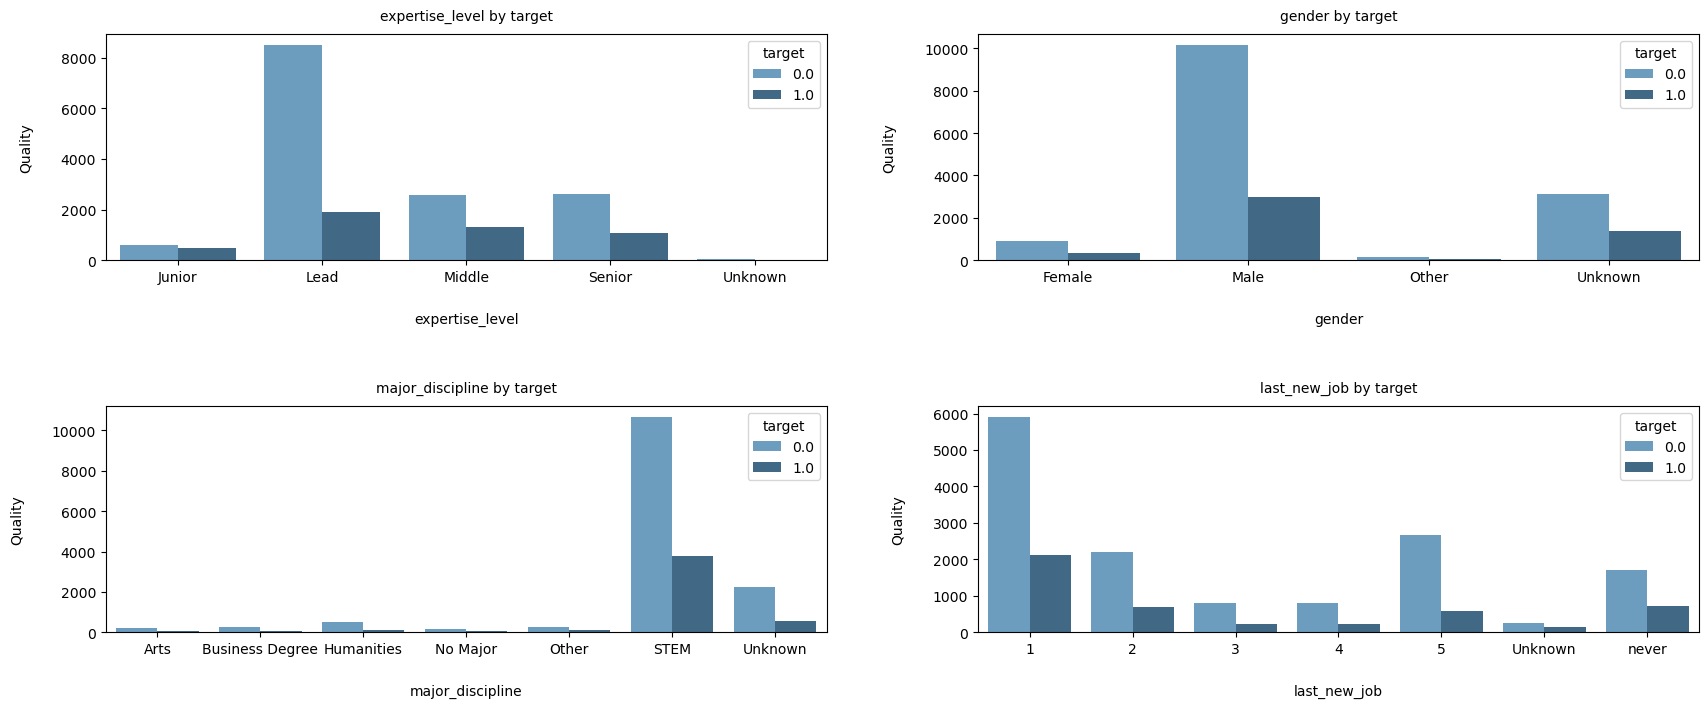

In [320]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8))
for i in range(0, 2):
    for j in range(0, 2):
        sns.barplot(ax = axes[i, j], data = dfs_name[i * 2 + j], x = cols_name[i * 2 + j], y = 'count', hue = 'target', palette='Blues_d')
        axes[i, j].set_title('{} by target'.format(cols_name[i * 2 + j]), pad=10, fontsize=10)
        axes[i, j].set_ylabel("Quality", labelpad=20)
        axes[i, j].set_xlabel(cols_name[i * 2 + j], labelpad=20)
    

fig.tight_layout(pad = 4.0)
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Model</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Import</b> libraries

In [321]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Build</b> base model

In [322]:
# Read the data
X_full = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv', index_col = 0)
X_test_full = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv', index_col = 0 )

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['target'], inplace=True)
y = X_full['target']
X_full.drop(['target'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>MAE</b> - Mean Absolute Error

In [323]:
# Function for comparing different models
def score_model(model, X_t = X_train, X_v = X_valid, y_t = y_train, y_v = y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Pipeline</b> - Define Preprocessing

In [324]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Decision</b> Tree

In [325]:
model = DecisionTreeRegressor(random_state = 0)
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)
# Evaluate the model
score = score_model(my_pipeline)
print('MAE:', score)

MAE: 0.2844902574808629


In [326]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000, 5000]
for leaf_size in candidate_max_leaf_nodes:
    model = DecisionTreeRegressor(max_leaf_nodes = leaf_size, random_state = 0)
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    score = round(score_model(my_pipeline),5)
    print("Leaf size {} MAE: {}".format(leaf_size, score))

Leaf size 5 MAE: 0.28887
Leaf size 25 MAE: 0.27715
Leaf size 50 MAE: 0.27601
Leaf size 100 MAE: 0.27765
Leaf size 250 MAE: 0.27952
Leaf size 500 MAE: 0.27731
Leaf size 1000 MAE: 0.27829
Leaf size 5000 MAE: 0.28305


In [327]:
final_model = DecisionTreeRegressor(max_leaf_nodes = 50, random_state = 0)

# Bundle preprocessing and modeling code in a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', final_model)])

# Preprocessing of training data, fit model 
final_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = final_pipeline.predict(X_valid)

# Evaluate the model
score = score_model(final_pipeline)
print('MAE:', score)

MAE: 0.27601130313397



<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Random</b> Forest

In [328]:
RF_model = RandomForestRegressor(n_estimators = 50, random_state = 0)

# Bundle preprocessing and modeling code in a pipeline
RF_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', RF_model)])

# Preprocessing of training data, fit model 
RF_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = RF_pipeline.predict(X_valid)

# Evaluate the model
score = score_model(RF_pipeline)
print('MAE:', score)

MAE: 0.2853452380952381


In [329]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(RF_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [0.28727418 0.28566051 0.28781429 0.27778766 0.28317542]
Average MAE score (across experiments):
0.28434241355448525
